# Week 4 handin

## 01 Assignment
Here is the text for the assignment linked to

## 02 Status
Here is a status on the handin. How far you got. What is implemented and what is not

# Ex 1 

1.With data aggregation and data visualization answer the following questions:

    A.What is the change in pct of divorced danes from 2008 to 2020?

In [1]:
import pandas as pd 
url1 = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2008K2%2C2008K3%2C2008K4%2C2020K1%2C2020K2%2C2020K3%2C2020K4&CIVILSTAND=F'
dst1 = pd.read_csv(url1, sep=";")

list_2008 = list(dst1.iloc[0:4]['INDHOLD'])
list_2020 = list(dst1.iloc[4:8]['INDHOLD'])

sum_2020 = sum(list_2020)
sum_2008 = sum(list_2008)

pct_diff = ((sum_2020 - sum_2008)/sum_2008)*100

print(pct_diff)



27.280625845151203


B.Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

In [2]:
import pandas as pd 
url1 = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U&OMR%C3%85DE=*&Tid=2020K1'
url2 = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&CIVILSTAND=*&Tid=2020K1'
dst1 = pd.read_csv(url1, sep=";")
dst2 = pd.read_csv(url2, sep=";")
sorted_dst1 = dst1.sort_values(by=["INDHOLD"], ascending=False)

sorted_dst2 = dst2.sort_values(by=["INDHOLD"], ascending=False)

total_unmarried = list(sorted_dst1.iloc[1:6]["INDHOLD"])
total_people = list(sorted_dst2.iloc[1:6]["INDHOLD"])

pct_array = []

for x in range(5):
    pct_diff =total_unmarried[x]/total_people[x]*100
    pct_array.append(pct_diff)

areas = list(sorted_dst1.iloc[1:6]["OMRÅDE"])

my_dict = dict(zip(areas, pct_array))

{k: v for k, v in sorted(my_dict.items(), key=lambda item: item[1], reverse=True)}

my_dict

{'Region Hovedstaden': 34.23985429280676,
 'Region Midtjylland': 30.448407445048197,
 'Region Syddanmark': 30.77567289248292,
 'København': 31.101527511799386,
 'Region Sjælland': 30.145817407336246}

C. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

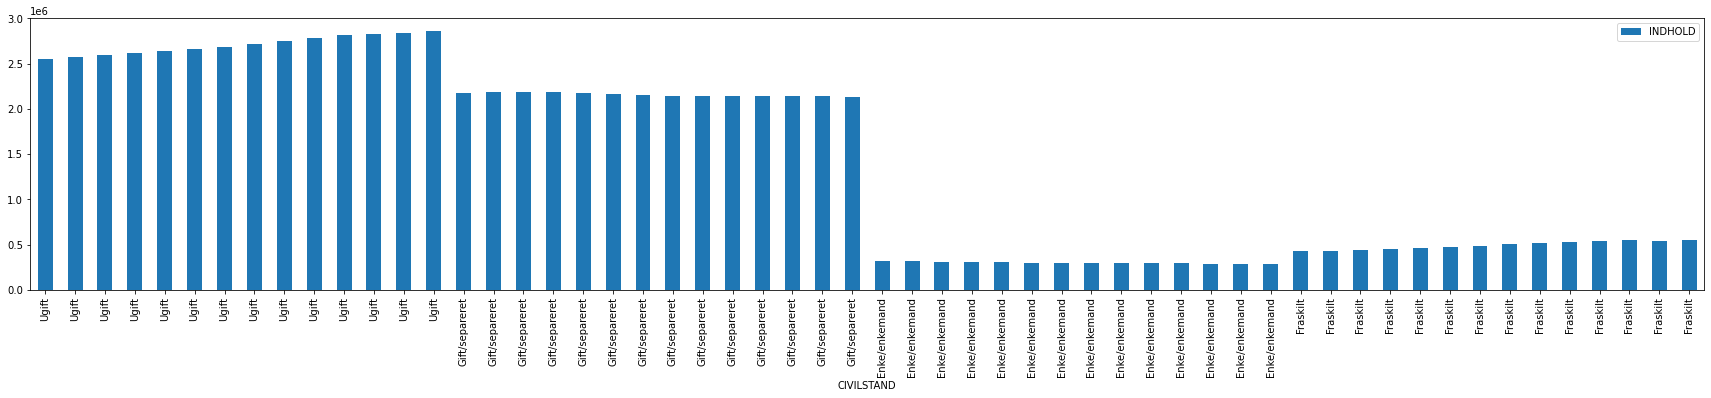

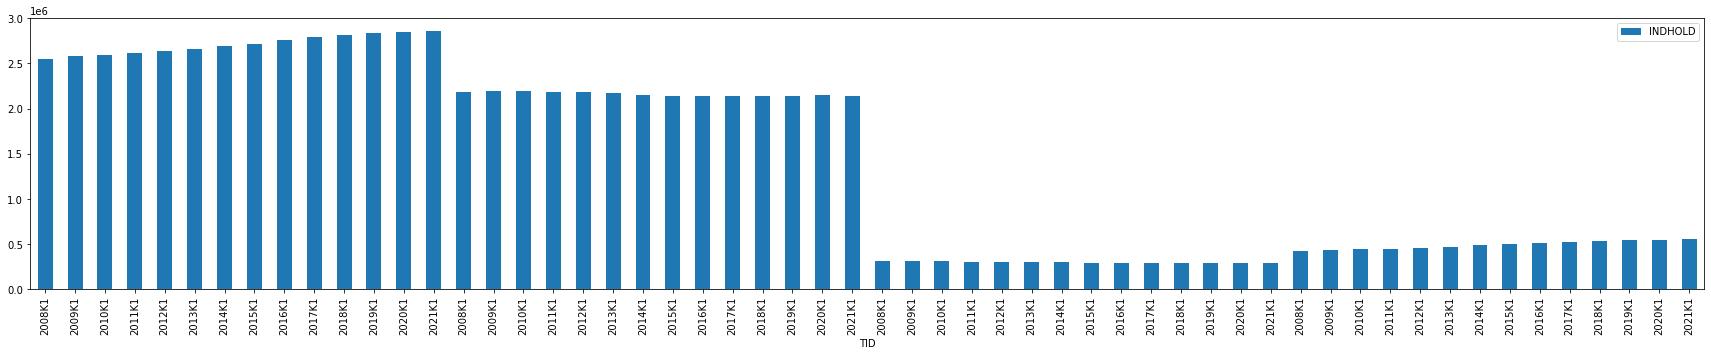

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CG%2CE%2CF&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1'
dst3 = pd.read_csv(url, sep=";")

dst3.plot.bar(figsize=(30,5), x = 'CIVILSTAND', y ='INDHOLD')
dst3.plot.bar(figsize=(30,5), x = 'TID', y ='INDHOLD')


D.Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

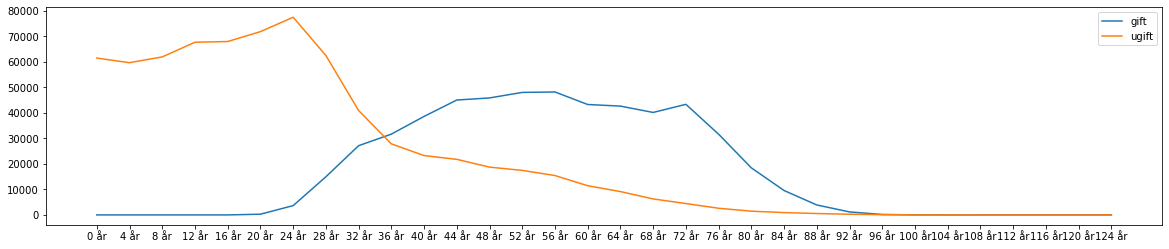

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 20, 4
url_married = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2020K1&ALDER=*&CIVILSTAND=G'
url_unmarried = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2020K1&ALDER=*&CIVILSTAND=U'
dst1 = pd.read_csv(url_married, sep=";")
dst2 = pd.read_csv(url_unmarried, sep=";")

ages_married = list(dst1.iloc[1::4]['ALDER'])
married_amount = list(dst1.iloc[1::4]['INDHOLD'])

ages_unmarried = list(dst2.iloc[1::4]['ALDER'])
unmarried_amount = list(dst2.iloc[1::4]['INDHOLD'])

plt.plot(ages_married, married_amount, label="gift")
plt.plot(ages_unmarried, unmarried_amount, label="ugift")

plt.legend()


